In [2]:
import xarray as xr
import numpy as np
import glob as glob

import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt
import matplotlib as mpl
import colormaps
import glob as glob
import matplotlib.path as mpath
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.ticker import ScalarFormatter,AutoLocator,MultipleLocator,AutoMinorLocator,FixedLocator
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm

from imods.stats import *

## iCESM1

In [3]:
def index(ds):
    return (ds*areacella).sel(lat=slice(70,90)).sum(dim=['lat','lon'])/areacella.sel(lat=slice(70,90)).sum(dim=['lat','lon'])

areacella = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/CESM2-LE/CESM2-FV2.areacella.nc')['areacella'].squeeze().load()

/home/itbaxter/.conda/envs/ianpy37/lib/python3.11/site-packages/xarray/conventions.py:427: SerializationWarning: variable 'areacella' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [4]:
def zonal_integration(ds):
    REARTH = 6.37122e6 #km
    rad2deg = 180/np.pi
    dx = ds.lon.diff('lon')
    area = (dx*3.1415926*REARTH/360.*2.)

    index = (ds * np.cos(ds.lat / 180. * 3.1415926) * area).sum(('lon'),skipna=True)
    return index

In [5]:
file = '/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/isotope-nudging2.cam.h0.Q.197901-202212.plev.nc'

q = xr.open_dataset(file)['Q']
q.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
q.coords['plev'] = q['plev']/100.
q

/tmp/ipykernel_32748/3300116723.py:4: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  q.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
/tmp/ipykernel_32748/3300116723.py:4: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced 

<xarray.DataArray 'Q' (time: 528, plev: 21, lat: 96, lon: 144)>
[153280512 values with dtype=float32]
Coordinates:
  * plev     (plev) float64 1e+03 975.0 950.0 925.0 ... 250.0 200.0 150.0 100.0
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
Attributes:
    mdims:         1
    units:         kg/kg
    long_name:     Specific humidity
    cell_methods:  time: mean

In [6]:
file = '/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/isotope-nudging2.cam.h0.TMQ.197901-202212.nc'

tmq = xr.open_dataset(file)['TMQ']
tmq.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
tmq

/tmp/ipykernel_32748/752647089.py:4: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  tmq.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
/tmp/ipykernel_32748/752647089.py:4: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced 

<xarray.DataArray 'TMQ' (time: 528, lat: 96, lon: 144)>
[7299072 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:         kg/m2
    long_name:     Total (vertically integrated) precipitable water
    cell_methods:  time: mean

In [7]:
file = '/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/isotope-nudging2.cam.h0.PRECL.197901-202212.nc'

icesm_precl = xr.open_dataset(file)['PRECL']
icesm_precl.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
icesm_precl

/tmp/ipykernel_32748/487579017.py:4: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  icesm_precl.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
/tmp/ipykernel_32748/487579017.py:4: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be s

<xarray.DataArray 'PRECL' (time: 528, lat: 96, lon: 144)>
[7299072 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:         m/s
    long_name:     Large-scale (stable) precipitation rate (liq + ice)
    cell_methods:  time: mean

In [8]:
file = '/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/isotope-nudging2.cam.h0.PRECC.197901-202212.nc'

icesm_precc = xr.open_dataset(file)['PRECC']
icesm_precc.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
icesm_precc

/tmp/ipykernel_32748/4209640804.py:4: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  icesm_precc.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
/tmp/ipykernel_32748/4209640804.py:4: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be

<xarray.DataArray 'PRECC' (time: 528, lat: 96, lon: 144)>
[7299072 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:         m/s
    long_name:     Convective precipitation rate (liq + ice)
    cell_methods:  time: mean

In [9]:
icesm_prect = (icesm_precl+icesm_precc)*8.64e+7
icesm_prect_i = index(jja(icesm_prect)).sel(year=slice(1979,2022))
icesm_prect_i

<xarray.DataArray (year: 44)>
array([1.0574534 , 1.1171943 , 1.1687233 , 1.0099621 , 1.2223358 ,
       1.0994166 , 0.96254265, 1.100166  , 0.96084964, 1.0984474 ,
       1.3171651 , 1.0071856 , 1.1617028 , 1.1896288 , 1.0471802 ,
       1.2290577 , 1.1648104 , 1.1010908 , 1.1092087 , 1.0305705 ,
       1.1191906 , 1.1213056 , 1.0573994 , 1.1276411 , 1.1701539 ,
       1.050673  , 1.0763835 , 1.1975224 , 0.9935271 , 1.0833757 ,
       1.0803875 , 1.213847  , 0.96344304, 1.2136308 , 1.1793792 ,
       1.145456  , 1.1023246 , 1.2572093 , 1.1912339 , 1.2439713 ,
       1.1323602 , 1.1224512 , 1.3465707 , 1.206448  ], dtype=float32)
Coordinates:
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2018 2019 2020 2021 2022

In [10]:
icesm_qi = index(jja(q))
icesm_qi

<xarray.DataArray (year: 45, plev: 21)>
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [3.62216285e-03, 3.56145063e-03, 3.52256303e-03, 3.46892676e-03,
        3.38500622e-03, 3.13648256e-03, 2.82338914e-03, 2.48101540e-03,
        2.12303060e-03, 1.77942729e-03, 1.43048330e-03, 1.10762916e-03,
        8.13944673e-04, 5.42601629e-04, 3.46806104e-04, 1.97199523e-04,
        1.05123545e-04, 5.80237320e-05, 2.72232228e-05, 6.50966285e-06,
        3.38247310e-06],
       [3.60219181e-03, 3.52670369e-03, 3.45766218e-03, 3.37642571e-03,
        3.26476316e-03, 2.97403126e-03, 2.64710863e-03, 2.31084577e-03,
        1.97651493e-03, 1.65579678e-03, 1.33248710e-03, 1.03393674e-03,
        7.61704869e-04, 5.10289334e-04, 3.28131340e-04, 1.88364327e-04,
        1.02197941e-04, 5.86301248e-05, 2.92251225e-05, 7.23774156e-06,
        4.39936321e-06],
       [3.64218559e-03, 3.55044426e-03, 3.46055278e-03, 3.37516447e-03,
        3.27024469e-03, 2.99999351e-03, 2.69294274e-03, 2.37318152e-03,
...
        1.13885872e-04, 6.31265357e-05, 3.32685631e-05, 8.86039743e-06,
        5.06985998e-06],
       [4.17533424e-03, 4.17469395e-03, 4.14437987e-03, 4.06866521e-03,
        3.94168170e-03, 3.59657407e-03, 3.19412770e-03, 2.78305262e-03,
        2.37647421e-03, 1.98722794e-03, 1.59397465e-03, 1.23116281e-03,
        9.02986911e-04, 6.01929962e-04, 3.87106935e-04, 2.21748123e-04,
        1.17536198e-04, 6.43717212e-05, 3.38567115e-05, 9.40811151e-06,
        5.49263268e-06],
       [3.94690083e-03, 3.89273721e-03, 3.81319970e-03, 3.72530310e-03,
        3.61207081e-03, 3.32689774e-03, 3.00310156e-03, 2.66052037e-03,
        2.30044033e-03, 1.93921116e-03, 1.56824186e-03, 1.22396846e-03,
        9.03803331e-04, 6.08902657e-04, 3.93798196e-04, 2.26677817e-04,
        1.21330850e-04, 6.69827423e-05, 3.19770661e-05, 8.71521024e-06,
        5.38265567e-06],
       [3.96289816e-03, 3.92344221e-03, 3.89639824e-03, 3.84654617e-03,
        3.75173520e-03, 3.45763518e-03, 3.09967925e-03, 2.71592080e-03,
        2.32083444e-03, 1.94090966e-03, 1.55639625e-03, 1.20932492e-03,
        8.91362200e-04, 5.96763042e-04, 3.82735830e-04, 2.17798239e-04,
        1.15319468e-04, 6.42741143e-05, 3.40829138e-05, 9.67308824e-06,
        5.82273378e-06]], dtype=float32)
Coordinates:
  * plev     (plev) float64 1e+03 975.0 950.0 925.0 ... 250.0 200.0 150.0 100.0
  * year     (year) int64 1978 1979 1980 1981 1982 ... 2018 2019 2020 2021 2022

In [11]:
ds_y = (icesm_qi.sel(plev=slice(1000,300)).integrate('plev')/-9.81).sel(year=slice(1981,2022))

r = linregress(ds_y,ds_y.year)
r.slope.values*10

0.003451976455047241

In [12]:
icesm_tmqi = index(jja(tmq))
icesm_tmqi

<xarray.DataArray (year: 45)>
array([ 0.       , 12.970526 , 12.296889 , 12.53984  , 12.16924  ,
       12.738471 , 12.860436 , 12.390529 , 12.104113 , 12.626492 ,
       12.976626 , 12.957275 , 13.158154 , 13.052436 , 11.93142  ,
       12.978603 , 12.530421 , 13.177103 , 11.72055  , 12.242947 ,
       13.549216 , 12.923288 , 12.376125 , 12.737954 , 12.992883 ,
       12.945294 , 12.965416 , 13.123073 , 13.042345 , 13.643747 ,
       12.846842 , 12.987881 , 13.4516535, 13.576211 , 13.9497175,
       12.919218 , 12.983302 , 13.444162 , 13.372174 , 12.766784 ,
       13.461071 , 13.826931 , 14.773849 , 13.828674 , 14.221476 ],
      dtype=float32)
Coordinates:
  * year     (year) int64 1978 1979 1980 1981 1982 ... 2018 2019 2020 2021 2022

In [13]:
ds_y = jja(tmq).sel(year=slice(1981,2022))
ds_x = ds_y.year

rtmq = linregress(ds_y,ds_x)
rtmq

<xarray.Dataset>
Dimensions:    (lat: 96, lon: 144, year: 42)
Coordinates:
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (lat, lon) float64 -7.729e-05 -7.729e-05 ... 0.03182 0.03182
    intercept  (lat, lon) float64 0.4804 0.4804 0.4804 ... -52.02 -52.02 -52.02
    r          (lat, lon) float64 -0.02803 -0.02803 -0.02803 ... 0.4465 0.4465
    p          (lat, lon) float64 0.8601 0.8601 0.8601 ... 0.003039 0.003039
    stderr     (lat, lon) float64 0.0004359 0.0004359 ... 0.01008 0.01008
    predicted  (year, lat, lon) float64 0.3273 0.3273 0.3273 ... 12.31 12.31

In [14]:
ds_y = jja(q.mean('lon')).sel(year=slice(1981,2022))
ds_x = ds_y.year

rq_zon = linregress(ds_y,ds_x)
rq_zon

<xarray.Dataset>
Dimensions:    (plev: 21, lat: 96, year: 42)
Coordinates:
  * plev       (plev) float64 1e+03 975.0 950.0 925.0 ... 200.0 150.0 100.0
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (plev, lat) float64 3.654e-08 7.996e-09 ... 6.939e-09 6.721e-09
    intercept  (plev, lat) float64 -1.301e-05 4.464e-05 ... -8.868e-06 -8.42e-06
    r          (plev, lat) float64 0.05671 0.01135 0.01278 ... 0.282 0.2693
    p          (plev, lat) float64 0.7213 0.9431 0.936 ... 0.07042 0.08456
    stderr     (plev, lat) float64 1.017e-07 1.114e-07 ... 3.733e-09 3.8e-09
    predicted  (year, plev, lat) float64 5.938e-05 6.049e-05 ... 5.169e-06

In [15]:
ds_y = jja(zonal_integration(q)).sel(year=slice(1981,2022))
ds_x = ds_y.year

rq_zon_int = linregress(ds_y,ds_x)
rq_zon_int

<xarray.Dataset>
Dimensions:    (plev: 21, lat: 96, year: 42)
Coordinates:
  * plev       (plev) float64 1e+03 975.0 950.0 925.0 ... 200.0 150.0 100.0
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (plev, lat) float64 3.893e-08 0.01033 ... 0.009126 7.159e-09
    intercept  (plev, lat) float64 -1.386e-05 59.02 175.0 ... -11.67 -8.969e-06
    r          (plev, lat) float64 0.05671 0.01115 0.01279 ... 0.2821 0.2693
    p          (plev, lat) float64 0.7213 0.9441 0.9359 ... 0.07027 0.08456
    stderr     (plev, lat) float64 1.084e-07 0.1465 ... 0.004907 4.047e-09
    predicted  (year, plev, lat) float64 6.325e-05 79.49 ... 6.786 5.506e-06

In [16]:
file = '/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/isotope-nudging2.cam.h0.Z3.197901-202212.plev.nc'

icesm_z3 = xr.open_dataset(file)
icesm_z3.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
icesm_z3.coords['plev'] = icesm_z3['plev'] /100
icesm_z3

/tmp/ipykernel_32748/1977268475.py:4: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  icesm_z3.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
/tmp/ipykernel_32748/1977268475.py:4: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be si

<xarray.Dataset>
Dimensions:    (plev: 21, time: 528, lat: 96, lon: 144, nbnd: 2)
Coordinates:
  * plev       (plev) float64 1e+03 975.0 950.0 925.0 ... 200.0 150.0 100.0
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
Dimensions without coordinates: nbnd
Data variables:
    PS         (time, lat, lon) float32 ...
    Z3         (time, plev, lat, lon) float32 ...
    time_bnds  (time, nbnd) object ...
Attributes: (12/16)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      isotope-nudging2
    title:                     Regridded version of isotope-nudging2.cam.h0.Z...
    logname:                   qinghua
    host:                      amery.eri.ucsb.e
    ...                        ...
    history:                   Sat Feb 17 21:14:15 2024: ncks -O -t 2 --no_tm...
    remap_script:              ncremap
    remap_hostname:            ross.eri.ucsb.edu
    remap_version:             5.1.9
    NCO:                       netCDF Operators version 5.1.9 (Homepage = htt...
    nco_openmp_thread_number:  2

In [17]:
gpcp = xr.open_dataset('/raid/scratch/scratch-polar/obs/gpcp-rain/precip.mon.mean.new.nc')
gpcp_i = jja(area_weighted_ave(gpcp['precip'].sel(lat=slice(70,90))))
gpcp

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, time: 511, nv: 2)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-07-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2021/06 through latest.

In [18]:
gpcp_ea = mon(area_weighted_ave(gpcp['precip'].sel(lat=slice(50,70),lon=slice(0,120))),month=6)

In [19]:
linregress(gpcp_ea.sel(year=slice(1981,2022)),gpcp_ea.sel(year=slice(1981,2022)).year)*10

<xarray.Dataset>
Dimensions:    (year: 41)
Coordinates:
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2018 2019 2020 2021
Data variables:
    slope      float64 0.003995
    intercept  float64 13.74
    r          float64 0.2868
    p          float64 8.587
    stderr     float64 0.0223
    predicted  (year) float64 21.65 21.66 21.66 21.66 ... 21.8 21.8 21.81 21.81

In [20]:
dware = xr.open_dataset('/raid/scratch/scratch-polar/obs/Delaware/air.mon.mean.v501.nc')
dware_i = jja(area_weighted_ave(dware['air'].sel(lat=slice(70,90))))
dware

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 1416)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2017-12-01
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    history:        created 2/2016 by CAS NOAA/ESRL PSD
    title:          Terrestrial Air Temperature and Precipitation: V4.01
    version:        5.01
    dataset_title:  Terrestrial Air Temperature and Precipitation: 1900-2017 ...
    References:     https://www.esrl.noaa.gov/psd/data/gridded/data.UDel_AirT...
    Source:         http://climate.geog.udel.edu/~climate/html_pages/download...

In [21]:
ds_y = jja(icesm_z3['Z3'].mean('lon')).sel(year=slice(1981,2022))
ds_x = ds_y.year

rz3_zon = linregress(ds_y,ds_x)
rz3_zon

<xarray.Dataset>
Dimensions:    (plev: 21, lat: 96, year: 42)
Coordinates:
  * plev       (plev) float64 1e+03 975.0 950.0 925.0 ... 200.0 150.0 100.0
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (plev, lat) float64 0.04691 0.04265 0.03306 ... 0.9639 0.9672
    intercept  (plev, lat) float64 -543.4 -513.5 -465.0 ... 1.441e+04 1.44e+04
    r          (plev, lat) float64 0.01505 0.01371 0.01081 ... 0.3177 0.3164
    p          (plev, lat) float64 0.9246 0.9313 0.9459 ... 0.04031 0.04124
    stderr     (plev, lat) float64 0.4927 0.4916 0.4838 ... 0.4417 0.4548 0.4586
    predicted  (year, plev, lat) float64 -450.5 -429.0 ... 1.635e+04 1.635e+04

In [22]:
ds_y = jja(icesm_z3['Z3']).sel(plev=200,year=slice(1981,2022))
ds_x = ds_y.year

rz3 = linregress(ds_y,ds_x)
rz3

<xarray.Dataset>
Dimensions:    (lat: 96, lon: 144, year: 42)
Coordinates:
    plev       float64 200.0
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (lat, lon) float64 0.2925 0.2925 0.2925 ... 1.472 1.472 1.472
    intercept  (lat, lon) float64 1.001e+04 1.001e+04 ... 8.718e+03 8.718e+03
    r          (lat, lon) float64 0.06674 0.06674 0.06674 ... 0.357 0.357 0.357
    p          (lat, lon) float64 0.6745 0.6745 0.6745 ... 0.0203 0.0203 0.0203
    stderr     (lat, lon) float64 0.6915 0.6915 0.6915 ... 0.6089 0.6089 0.6089
    predicted  (year, lat, lon) float64 1.059e+04 1.059e+04 ... 1.169e+04

In [23]:
def icesm_reader(var):
    file = f'/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/isotope-nudging2/atm/isotope-nudging2.cam.h0.{var}.197901-202212.plev.nc'

    ds = xr.open_dataset(file)
    ds.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
    return ds

In [24]:
icesm_u = icesm_reader('U')
icesm_v = icesm_reader('V')
icesm_q = icesm_reader('Q')

/tmp/ipykernel_32748/112635528.py:5: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds.coords['time'] = np.arange('1979-01-01','2023-01-01',dtype='datetime64[M]')
/tmp/ipykernel_32748/112635528.py:5: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced b

In [25]:
icesm_vivt = (icesm_v['V']*icesm_q['Q']).integrate('plev')/(-9.81)
icesm_uivt = (icesm_u['U']*icesm_q['Q']).integrate('plev')/(-9.81)

In [26]:
def zonal_integration(ds):
    REARTH = 6.37122e6 #km
    rad2deg = 180/np.pi
    dx = ds.lon.diff('lon')
    area = (dx*3.1415926*REARTH/360.*2.)

    index = (ds * np.cos(ds.lat / 180. * 3.1415926) * area).sum(('lon'),skipna=True)
    return index

In [27]:
vivt_70 = zonal_integration(icesm_vivt).sel(lat=70,method='nearest')

In [28]:
ds_y = jja(icesm_vivt).sel(year=slice(1981,2022))
ds_x = ds_y.year

rv = linregress(ds_y,ds_x)

In [29]:
ds_y = jja(icesm_uivt).sel(year=slice(1981,2022))
ds_x = ds_y.year

ru = linregress(ds_y,ds_x)

In [30]:
ds_y = jja(np.sqrt(icesm_uivt*icesm_uivt+icesm_vivt*icesm_vivt)).sel(year=slice(1981,2022))
ds_x = ds_y.year

rt = linregress(ds_y,ds_x)

## ERA5

In [31]:
file = '/raid/scratch/scratch-polar/obs/ERA5/precipitaion/download.1979-2022.nc'

era5_precip = xr.open_dataset(file)
era5_precip

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 528)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-01 23:12:27 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [32]:
era5_prect_i = 32.8767*area_weighted_ave(jja(era5_precip['tp']).sel(latitude=slice(90,70)).rename({'latitude':'lat','longitude':'lon'})).sel(year=slice(1979,2022))
era5_prect_i

<xarray.DataArray (year: 44)>
array([0.03715523, 0.04027807, 0.04039536, 0.03683051, 0.0425451 ,
       0.0390296 , 0.03439467, 0.03912304, 0.03400117, 0.03845813,
       0.04532522, 0.03530098, 0.0411432 , 0.04181653, 0.03623816,
       0.04298111, 0.03915959, 0.03974976, 0.03832324, 0.03532416,
       0.03867434, 0.03926857, 0.03792359, 0.03905381, 0.04011885,
       0.03593332, 0.03582869, 0.04041659, 0.03395149, 0.03754802,
       0.03711364, 0.04065623, 0.03265543, 0.04058784, 0.04063244,
       0.03884558, 0.03686611, 0.04304733, 0.04116135, 0.04197758,
       0.03903693, 0.03894486, 0.04426531, 0.04039641], dtype=float32)
Coordinates:
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2018 2019 2020 2021 2022

files = sorted(glob.glob('/raid/scratch/scratch-polar/obs/ERA5/pressure/all/era5*nc'))

def preprocess(ds):
    return ds.integrate('level')/9.81

q = [preprocess(xr.open_dataset(file)) for file in files]
q = xr.concat(q,dim='time')
q = q.rename({'latitude':'lat','longitude':'lon'})
q

In [33]:
files = sorted(glob.glob('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/ERA5/q/*nc'))

era5_q = xr.open_mfdataset(files,combine='nested',concat_dim='time')['q']
era5_q.coords['latitude'] = icesm_q['lat'].values
era5_q.coords['longitude'] = icesm_q['lon'].values
era5_q = era5_q.rename({'latitude':'lat','longitude':'lon','level':'lev'})
era5_q

/home/itbaxter/.conda/envs/ianpy37/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


<xarray.DataArray 'q' (time: 528, lev: 37, lat: 96, lon: 144)>
dask.array<concatenate, shape=(528, 37, 96, 144), dtype=float32, chunksize=(12, 37, 96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lev      (lev) int32 1 2 3 5 7 10 20 30 ... 825 850 875 900 925 950 975 1000
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:          kg kg**-1
    long_name:      Specific humidity
    standard_name:  specific_humidity
    cell_measures:  area: area

In [34]:
ds_y = jja(era5_q.integrate('lev')/9.81).sel(year=slice(1981,2022)).load()
ds_x = ds_y.year

erq = linregress(ds_y,ds_x)
erq

<xarray.Dataset>
Dimensions:    (lat: 96, lon: 144, year: 42)
Coordinates:
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (lat, lon) float64 -2.165e-06 -2.096e-06 ... 0.0002385 0.0002386
    intercept  (lat, lon) float64 0.008575 0.008428 0.008385 ... -0.3731 -0.3731
    r          (lat, lon) float64 -0.05018 -0.0486 -0.0483 ... 0.4127 0.4127
    p          (lat, lon) float64 0.7523 0.7599 0.7613 ... 0.0066 0.006599
    stderr     (lat, lon) float64 6.814e-06 6.811e-06 ... 8.324e-05 8.325e-05
    predicted  (year, lat, lon) float64 0.004286 0.004276 ... 0.1093 0.1093

In [35]:
ds_y = jja(era5_q.mean('lon')).sel(year=slice(1981,2022)).load()
ds_x = ds_y.year

erq_zon = linregress(ds_y,ds_x)
erq_zon

<xarray.Dataset>
Dimensions:    (lev: 37, lat: 96, year: 42)
Coordinates:
  * lev        (lev) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (lev, lat) float64 -2.548e-09 -2.573e-09 ... 1.016e-06 8.9e-07
    intercept  (lev, lat) float64 8.805e-06 8.856e-06 ... 0.001431 0.00168
    r          (lev, lat) float64 -0.361 -0.3582 -0.32 ... 0.1612 0.1407 0.1194
    p          (lev, lat) float64 0.01884 0.01986 0.03886 ... 0.3742 0.4512
    stderr     (lev, lat) float64 1.041e-09 1.06e-09 ... 1.131e-06 1.17e-06
    predicted  (year, lev, lat) float64 3.757e-06 3.759e-06 ... 0.003479

In [36]:
ds_y = jja(zonal_integration(era5_q)).sel(year=slice(1981,2022)).load()
ds_x = ds_y.year

erq_zon_int = linregress(ds_y,ds_x)
erq_zon_int

<xarray.Dataset>
Dimensions:    (lev: 37, lat: 96, year: 42)
Coordinates:
  * lev        (lev) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (lev, lat) float64 -2.715e-09 -0.003383 ... 1.333 9.471e-07
    intercept  (lev, lat) float64 9.381e-06 11.64 22.0 ... 1.887e+03 0.001791
    r          (lev, lat) float64 -0.3611 -0.3583 -0.3195 ... 0.1404 0.1193
    p          (lev, lat) float64 0.01879 0.01981 0.03914 ... 0.3752 0.4517
    stderr     (lev, lat) float64 1.109e-09 0.001394 ... 1.487 1.246e-06
    predicted  (year, lev, lat) float64 4.002e-06 4.941 ... 4.582e+03 0.003706

In [37]:
erq_i = index(jja((era5_q.integrate('lev')/9.81).sel(lat=slice(70,90))))
erq_i

<xarray.DataArray (year: 45)>
dask.array<truediv, shape=(45,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 1978 1979 1980 1981 1982 ... 2018 2019 2020 2021 2022

In [38]:
files = sorted(glob.glob('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/ERA5/z3/*nc'))

era5_z3 = xr.open_mfdataset(files,combine='nested',concat_dim='time')['z']
era5_z3.coords['latitude'] = icesm_q['lat'].values
era5_z3.coords['longitude'] = icesm_q['lon'].values
era5_z3 = era5_z3.rename({'latitude':'lat','longitude':'lon','level':'lev'})
era5_z3

/home/itbaxter/.conda/envs/ianpy37/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


<xarray.DataArray 'z' (time: 528, lev: 37, lat: 96, lon: 144)>
dask.array<concatenate, shape=(528, 37, 96, 144), dtype=float32, chunksize=(12, 37, 96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lev      (lev) int32 1 2 3 5 7 10 20 30 ... 825 850 875 900 925 950 975 1000
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:          m**2 s**-2
    long_name:      Geopotential
    standard_name:  geopotential
    cell_measures:  area: area

In [39]:
files = sorted(glob.glob('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/ERA5/u/*nc'))

era5_u = xr.open_mfdataset(files,combine='nested',concat_dim='time')['u']
era5_u.coords['latitude'] = icesm_q['lat'].values
era5_u.coords['longitude'] = icesm_q['lon'].values
era5_u = era5_u.rename({'latitude':'lat','longitude':'lon','level':'lev'})
era5_u

/home/itbaxter/.conda/envs/ianpy37/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


<xarray.DataArray 'u' (time: 528, lev: 37, lat: 96, lon: 144)>
dask.array<concatenate, shape=(528, 37, 96, 144), dtype=float32, chunksize=(12, 37, 96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lev      (lev) int32 1 2 3 5 7 10 20 30 ... 825 850 875 900 925 950 975 1000
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:          m s**-1
    long_name:      U component of wind
    standard_name:  eastward_wind
    cell_measures:  area: area

In [40]:
files = sorted(glob.glob('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/ERA5/v/*nc'))

era5_v = xr.open_mfdataset(files,combine='nested',concat_dim='time')['v']
era5_v.coords['latitude'] = icesm_q['lat'].values
era5_v.coords['longitude'] = icesm_q['lon'].values
era5_v = era5_v.rename({'latitude':'lat','longitude':'lon','level':'lev'})
era5_v

/home/itbaxter/.conda/envs/ianpy37/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


<xarray.DataArray 'v' (time: 528, lev: 37, lat: 96, lon: 144)>
dask.array<concatenate, shape=(528, 37, 96, 144), dtype=float32, chunksize=(12, 37, 96, 144), chunktype=numpy.ndarray>
Coordinates:
  * lev      (lev) int32 1 2 3 5 7 10 20 30 ... 825 850 875 900 925 950 975 1000
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-12-01
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    units:          m s**-1
    long_name:      V component of wind
    standard_name:  northward_wind
    cell_measures:  area: area

In [41]:
era5_vivt = (era5_v*era5_q).integrate('lev')/9.81
era5_uivt = (era5_u*era5_q).integrate('lev')/9.81

In [42]:
ds_y = jja(era5_vivt).sel(year=slice(1981,2022)).load()
ds_x = ds_y.year

ervivt = linregress(ds_y,ds_x)
ervivt

<xarray.Dataset>
Dimensions:    (lat: 96, lon: 144, year: 42)
Coordinates:
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (lat, lon) float64 9.564e-06 9.052e-06 ... -0.004757 -0.004861
    intercept  (lat, lon) float64 -0.03466 -0.03375 -0.03279 ... 9.471 9.675
    r          (lat, lon) float64 0.01636 0.01551 0.01468 ... -0.344 -0.3525
    p          (lat, lon) float64 0.9181 0.9223 0.9265 ... 0.02569 0.02203
    stderr     (lat, lon) float64 9.24e-05 9.227e-05 ... 0.002053 0.00204
    predicted  (year, lat, lon) float64 -0.01572 -0.01582 ... -0.1475 -0.154

In [43]:
ds_y = jja(era5_uivt).sel(year=slice(1981,2022)).load()
ds_x = ds_y.year

eruivt = linregress(ds_y,ds_x)
eruivt

<xarray.Dataset>
Dimensions:    (lat: 96, lon: 144, year: 42)
Coordinates:
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (lat, lon) float64 1.2e-06 6.647e-07 ... 0.001623 0.001412
    intercept  (lat, lon) float64 -0.003077 -0.001364 ... -3.177 -2.757
    r          (lat, lon) float64 0.003503 0.001943 0.000463 ... 0.1151 0.09958
    p          (lat, lon) float64 0.9824 0.9903 0.9977 ... 0.4088 0.4678 0.5304
    stderr     (lat, lon) float64 5.417e-05 5.409e-05 ... 0.002214 0.00223
    predicted  (year, lat, lon) float64 -0.0007004 -4.757e-05 ... 0.1037 0.09719

In [44]:
ds_y = jja(era5_z3).sel(lev=200,year=slice(1981,2022)).load()
ds_x = ds_y.year

erz3 = linregress(ds_y,ds_x)
erz3

<xarray.Dataset>
Dimensions:    (lat: 96, lon: 144, year: 42)
Coordinates:
    lev        int32 200
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (lat, lon) float64 3.233 3.247 3.233 3.18 ... 15.05 15.04 15.01
    intercept  (lat, lon) float64 9.742e+04 9.739e+04 ... 8.411e+04 8.416e+04
    r          (lat, lon) float64 0.07556 0.07579 0.07543 ... 0.3798 0.3787
    p          (lat, lon) float64 0.6344 0.6333 0.635 ... 0.01308 0.01311 0.0134
    stderr     (lat, lon) float64 6.746 6.754 6.758 6.759 ... 5.795 5.792 5.801
    predicted  (year, lat, lon) float64 1.038e+05 1.038e+05 ... 1.145e+05

In [45]:
ds_y = jja(era5_z3.mean('lon')).sel(year=slice(1981,2022)).load()
ds_x = ds_y.year

erz3_zon = linregress(ds_y,ds_x)
erz3_zon

<xarray.Dataset>
Dimensions:    (lev: 37, lat: 96, year: 42)
Coordinates:
  * lev        (lev) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2019 2020 2021 2022
Data variables:
    slope      (lev, lat) float64 -105.3 -105.1 -104.7 ... 2.694 2.857 2.914
    intercept  (lev, lat) float64 6.227e+05 6.225e+05 ... -4.913e+03 -5.033e+03
    r          (lev, lat) float64 -0.5601 -0.5616 -0.5656 ... 0.1209 0.1206
    p          (lev, lat) float64 0.0001148 0.0001089 ... 0.4458 0.4468
    stderr     (lev, lat) float64 24.62 24.49 24.14 23.62 ... 3.499 3.71 3.793
    predicted  (year, lev, lat) float64 4.142e+05 4.143e+05 ... 863.4 859.9

In [46]:
cesm2_areacella = xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/CESM2-LE/CESM2.areacella.nc')['areacella'].squeeze()

In [47]:
def preprocess(ds):
    cesm2_areacella.coords['lat'] = ds['lat']
    cesm2_areacella.coords['lon'] = ds['lon']
    index = (ds['PRECT']*cesm2_areacella).sel(lat=slice(70,90)).sum(dim=['lat','lon'])/cesm2_areacella.sel(lat=slice(70,90)).sum(dim=['lat','lon'])
    return index.squeeze()

def process(i):
    files = sorted(glob.glob(f'/home/scratch-qinghua3/exp/cesm-len2/rain/his/cmip6/1001/b.e21.BHISTcmip6.f09_g17.LE2*.{i:03.0f}.cam.h0.PRECT*nc'))

    cesm2_prect = xr.open_mfdataset(files[-5:],combine='nested',concat_dim='time',preprocess=preprocess)
    cesm2_prect.coords['time'] = np.arange('1970-01-01','2015-01-01',dtype='datetime64[M]')
    
    files = sorted(glob.glob(f'/home/scratch-qinghua3/exp/cesm-len2/rain/ssp/cmip6/1001/b.e21.BSSP370cmip6.f09_g17.LE2*.{i:03.0f}.cam.h0.PRECT.201501-202412.nc'))

    ssp = xr.open_mfdataset(files[0],combine='nested',concat_dim='time',preprocess=preprocess)
    ssp.coords['time'] = np.arange('2015-01-01','2025-01-01',dtype='datetime64[M]')
    
    return xr.concat([cesm2_prect,ssp],dim='time')

cesm2_prect = [process(i) for i in range(1,11)]
cesm2_prect = xr.concat(cesm2_prect,dim='ens')
cesm2_prect.coords['ens'] = np.arange(1,11,step=1)
cesm2_prect_i = jja(cesm2_prect*8.64e+7).sel(year=slice(1979,2022))
cesm2_prect_i

/home/itbaxter/.conda/envs/ianpy37/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/tmp/ipykernel_32748/2000227411.py:11: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  cesm2_prect.coords['time'] = np.arange('1970-01-01','2015-01-01',dtype='datetime64[M]')
/tmp/ipykernel_32748/2000227411.py:11: UserWarning: Converting non-nanosecond precision datetime values to na

<xarray.DataArray (ens: 10, year: 44)>
dask.array<getitem, shape=(10, 44), dtype=float32, chunksize=(1, 1), chunktype=numpy.ndarray>
Coordinates:
    member_id  <U8 'r1i1p1f1'
  * ens        (ens) int64 1 2 3 4 5 6 7 8 9 10
  * year       (year) int64 1979 1980 1981 1982 1983 ... 2019 2020 2021 2022

In [48]:
cesm2_tmq = jja(xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/CESM2-LE/cesm2-le.cmip6.TMQ.arctic.month.nc')['TMQ']).sel(year=slice(1979,2014))
cesm2_ssp = jja(xr.open_dataset('/raid/scratch/scratch-itbaxter/exp/CESM2-LE/cesm2-le.ssp370.TMQ.arctic.month.nc')['TMQ']).sel(year=slice(2015,2022))
cesm2_tmq = xr.concat([cesm2_tmq,cesm2_ssp],dim='year')
cesm2_tmq

/home/itbaxter/.conda/envs/ianpy37/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


<xarray.DataArray 'TMQ' (member_id: 50, year: 44)>
array([[12.281608 , 12.875581 , 11.715186 , ..., 13.524606 , 13.824326 ,
        13.955856 ],
       [13.043269 , 12.262017 , 12.38414  , ..., 13.401925 , 14.074401 ,
        14.089271 ],
       [12.183917 , 12.433249 , 11.568252 , ..., 14.17672  , 13.521118 ,
        13.881612 ],
       ...,
       [12.029179 , 11.885253 , 11.27954  , ..., 13.3333235, 13.925267 ,
        13.475528 ],
       [12.201217 , 12.121587 , 12.104108 , ..., 13.85674  , 13.740788 ,
        14.39474  ],
       [12.228648 , 12.523425 , 12.305371 , ..., 14.377812 , 13.17118  ,
        14.091151 ]], dtype=float32)
Coordinates:
  * member_id  (member_id) object 'r10i1181p1f1' ... 'r9i1301p1f1'
  * year       (year) int64 1979 1980 1981 1982 1983 ... 2019 2020 2021 2022

In [49]:
ds_y = erq_i.sel(year=slice(1981,2022))*1000
ds_x = ds_y.year

r = linregress(ds_y,ds_x)
r.slope.values

array(0.26826505)

In [50]:
ds_y =(1000*icesm_qi.integrate('plev')/-9.81).sel(year=slice(1981,2022))
ds_x = ds_y.year

r = linregress(ds_y,ds_x)
r.slope.values

array(0.34841517)

In [51]:
ds_y = cesm2_tmq.mean('member_id').sel(year=slice(1981,2022))*10
ds_x = ds_y.year

r = linregress(ds_y,ds_x)
r.slope.values

array(0.53221235)

## OBS RAIN

In [ ]:
#file = '/raid/scratch/scratch-polar/obs/gpcc-rain/precip.mon.total.v7.nc'
#file = '/raid/scratch/scratch-itbaxter/obs/GPCC/precip.monitor.mon.total.1x1.v2020.nc'
file = '/raid/scratch/scratch-itbaxter/obs/GPCC/precip.comb.v2020to2019-v2020monitorafter.total.nc'

gpcc = xr.open_dataset(file)
gpcc

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1596)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 1891-01-01 1891-02-01 ... 2023-12-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Original_Source:  http://www.dwd.de/en/FundE/Klima/KLIS/int/GPCC/GPCC.htm...
    Reference:        Users of the data sets are kindly requested to give fee...
    original_source:  ftp://ftp-anon.dwd.de/pub/data/gpcc/html/download_gate....
    Conventions:      CF 1.0
    dataset_title:    Global Precipitation Climatology Centre (GPCC)
    title:            GPCC Full Data Reanalysis Version 2020 1.0x1.0 Monthly ...
    history:          Created 07/2021  based on V2020 data obtained via ftp
    References:       https://www.psl.noaa.gov/data/gridded/data.gpcc.html

In [52]:
igpcc = jja(area_weighted_ave(gpcc['precip'].sel(lat=slice(90,70)))) #/30 #.sel(year=slice(1979,2022))
igpcc

NameError: name 'gpcc' is not defined

In [ ]:
gpm = jja(xr.open_dataset('/raid/scratch/scratch-itbaxter/obs/GPM/gpm.prec.arctic.70-90N.month.2000-2023.nc')['__xarray_dataarray_variable__'])
gpm

<xarray.DataArray (year: 134)>
array([      nan, 23.413889, 23.312765, 24.090363, 23.456728, 24.123617,
       24.10372 , 23.686914, 23.948076, 23.66422 , 24.000076, 24.318441,
       23.998003, 24.476517, 23.622545, 23.83342 , 23.729403, 24.748816,
       24.7245  , 23.887232, 23.500235, 23.653854, 24.329317, 23.657019,
       23.084528, 23.444489, 24.693327, 23.935545, 23.619238, 23.656507,
       23.635897, 24.684706, 23.07678 , 23.172089, 23.210688, 23.494537,
       22.880236, 23.45078 , 23.689156, 22.979277, 23.387476, 23.088957,
       22.708166, 22.762154, 23.74043 , 24.65283 , 22.752739, 25.268213,
       24.855377, 25.724228, 24.489202, 26.271072, 24.732355, 24.271643,
       24.544966, 23.576742, 22.312668, 23.2501  , 22.816977, 22.478468,
       20.826685, 24.026098, 23.806177, 25.595345, 25.808174, 25.935358,
       20.676666, 21.68041 , 22.428385, 21.221891, 24.732264, 24.128677,
       23.93855 , 24.32717 , 25.108055, 22.054817, 27.29136 , 24.631897,
       27.50165 , 25.390371, 27.527918, 25.191238, 24.292824, 28.197409,
       24.94664 , 24.510328, 23.800064, 21.073473, 21.094538, 22.794174,
       23.858696, 24.23446 , 22.568644, 25.707418, 24.676208, 20.848808,
       22.093302, 21.915445, 24.140455, 25.711702, 22.91623 , 24.612482,
       22.51406 , 20.592958, 23.224983, 24.040344, 23.21218 , 25.442286,
       23.217196, 24.814035, 23.999107, 24.378489, 24.523993, 23.571367,
       25.113953, 24.91067 , 25.208273, 22.295889, 24.088852, 22.413084,
       24.31286 , 22.869207, 25.009703, 23.881126, 24.27381 , 24.221502,
       23.584335, 23.779358, 26.909477, 25.683294, 24.727396, 26.00084 ,
       24.72345 , 25.305443], dtype=float32)
Coordinates:
  * year     (year) int64 1890 1891 1892 1893 1894 ... 2019 2020 2021 2022 2023

In [ ]:
file = '/raid/scratch/scratch-polar/obs/cmap-rain/precip.mon.mean.nc'

cmap = jja(xr.open_dataset(file))
cmap

<xarray.DataArray '__xarray_dataarray_variable__' (year: 24)>
array([0.03616097, 0.04085307, 0.04354142, 0.0454024 , 0.04066694,
       0.04567513, 0.04614927, 0.04776369, 0.0444832 , 0.0451398 ,
       0.05685938, 0.04384599, 0.05444016, 0.0522371 , 0.03882198,
       0.04255081, 0.04046815, 0.03692122, 0.03902511, 0.03996854,
       0.04326038, 0.04071055, 0.04675191, 0.04122545], dtype=float32)
Coordinates:
  * year     (year) int64 2000 2001 2002 2003 2004 ... 2019 2020 2021 2022 2023

In [ ]:
icmap = area_weighted_ave(cmap['precip'].sel(lat=slice(90,70))).sel(year=slice(1979,2022))
icmap

/home/itbaxter/.conda/envs/ianpy37/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/home/itbaxter/.conda/envs/ianpy37/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


<xarray.Dataset>
Dimensions:  (year: 46, lat: 72, lon: 144)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * year     (year) int64 1978 1979 1980 1981 1982 ... 2019 2020 2021 2022 2023
Data variables:
    precip   (year, lat, lon) float32 nan nan nan nan ... 0.73 0.72 0.7067
Attributes:
    Conventions:    COARDS
    title:          CPC Merged Analysis of Precipitation (includes NCEP Reana...
    platform:       Analyses
    source:         ftp ftp.cpc.ncep.noaa.gov precip/cmap/monthly
    dataset_title:  CPC Merged Analysis of Precipitation
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    date_modified:  26 Feb 2019
    References:     https://www.psl.noaa.gov/data/gridded/data.cmap.html
    version:        V2309
    history:        update 09/2023 V2309
    data_modified:  2023-09-18

In [ ]:
files = sorted(glob.glob('/raid/scratch/scratch-polar/obs/Delaware/precip.mon.total.*.nc'))

dware1 = xr.open_dataset(files[0])['precip'].resample(time='QS-DEC').sum('time')
dware = dware1.where(dware1['time.month'] == 6).groupby('time.year').mean('time').sel(year=slice(1979,2022))
idware = area_weighted_ave(dware.sel(lat=slice(90,70)))
idware

<xarray.DataArray (year: 44)>
array([0.9204073 , 1.0124692 , 1.0170677 , 0.8844881 , 0.9904071 ,
       0.91294754, 0.7799473 , 0.9081946 , 0.8111778 , 0.87011164,
       1.0227559 , 0.78886026, 0.919073  , 0.9922443 , 0.8658224 ,
       1.00682   , 0.9778609 , 0.98315394, 0.961102  , 0.84121466,
       0.96690387, 0.9760118 , 1.006153  , 0.98482686, 0.9727467 ,
       0.92356765, 0.92205614, 1.0603614 , 0.8313758 , 0.87780404,
       0.89875877, 0.97774523, 0.8166749 , 0.9970126 , 0.95022774,
       0.89133906, 0.8423591 , 1.0230248 , 0.9416629 , 0.9783207 ,
       0.87287825, 0.8650225 , 0.9761908 , 0.92112714], dtype=float32)
Coordinates:
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2018 2019 2020 2021 2022

In [ ]:
idware = area_weighted_ave(dware.sel(lat=slice(90,70)))
idware

NameError: name 'area_weighted_ave' is not defined

## PLOT

NameError: name 'idware' is not defined

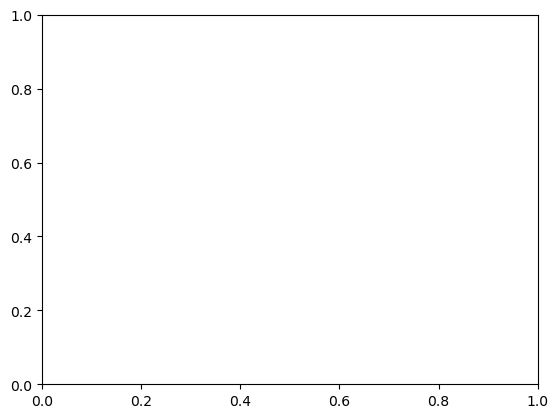

In [ ]:
# Create a custom RdYlBu colormap with white in the middle
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = 7
mpl.rcParams['hatch.color'] = 'silver'

fig = plt.figure(figsize=(7.5,8))
## Panel 1 --------------------------------------------------
ax = fig.add_subplot(321)
ax.set_xlim([1978,2023])
#ax.set_ylim([100,1000])
ax.set_ylabel(r'JJA Total Precipitable Water [kg $\mathrm{m^{-2}}$]')
ax.set_xlabel('year')
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.25)
ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    
ax.text(-0.03, 1.05, 'a', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

fills = ax.fill_between(np.arange(1979,2023,step=1),cesm2_tmq.min('member_id'),cesm2_tmq.max('member_id'),color='silver',alpha=0.4)

icesm_qi_sel = (100*icesm_qi.integrate('plev')/-9.81).sel(year=slice(1979,2022))
ln2 = ax.plot(icesm_qi_sel['year'],icesm_qi_sel,
              color='k',
              linewidth=1.5,
              zorder=11,
              label='iCESM1')
erq_i_sel = erq_i.sel(year=slice(1979,2022))
ln3 = ax.plot(erq_i_sel['year'],erq_i_sel*100,
              color='#AA4499',
              linewidth=1.5,
              zorder=11,
              label='ERA5')

ln1 = ax.plot(np.arange(1979,2023,step=1),cesm2_tmq.mean('member_id').values,
              c='#6699CC',linewidth=1.5,label='CESM2-LE',zorder=10)

plt.legend(frameon=False,fontsize=7)

## Panel 2 --------------------------------------------------
ax = fig.add_subplot(322)
ax.set_xlim([1978,2023])
ax.set_ylim([0.62,1.5])
ax.set_ylabel(r'JJA Total Precipitation [mm $\mathrm{day^{-1}}$]')
ax.yaxis.set_label_position("right")
ax.set_xlabel('year')
ax.yaxis.tick_right()
for axis in ['bottom','right']:
    ax.spines[axis].set_linewidth(1.25)
ax.spines[['left', 'top']].set_visible(False)
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.02))    

ax.text(-0.03, 1.05, 'b', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

fills = ax.fill_between(np.arange(1979,2023,step=1),cesm2_prect_i.min('ens'),cesm2_prect_i.max('ens'),
                        zorder=10,
                          label='CESM2-LE Spread',
                        color='silver',alpha=0.4)

obs = xr.concat([idware*10/92,icmap,gpcp_i,igpcc.sel(year=slice(1979,2022))/30,24*gpm.sel(year=slice(1979,2022))],dim='product').sel(year=slice(1979,2022))

lnobs = ax.fill_between(np.arange(1979,2023,step=1),obs.min('product'),obs.max('product'),
                          zorder=11,
                          label='Obs Spread',
                          color='tab:green',alpha=0.4)

leg2 = plt.legend(loc='lower left', 
                 bbox_to_anchor=[0.4, 0.9], 
                 frameon=False,fontsize=7)
ax.add_artist(leg2)

ln2, = ax.plot(icesm_prect_i['year'],icesm_prect_i,zorder=20,linewidth=1.5,c='k',label='iCESM1')
ln3, = ax.plot(era5_prect_i['year'],era5_prect_i*30,zorder=20,linewidth=1.5,c='#AA4499',label='ERA5')                 
                 
ln10, = ax.plot(np.arange(1979,2023,step=1),cesm2_prect_i.mean('ens').sel(year=slice(1979,2022)).values,
               zorder=11,
               c='#6699CC',linewidth=1.5,label='CESM2-LE')

leg1 = plt.legend(handles=[ln2,ln3,ln10],loc='lower left', 
                 bbox_to_anchor=[0.1, 0.85], 
                 frameon=False,fontsize=7)

# Panel 3--------------------------------------------------
ax = fig.add_subplot(323,projection=ccrs.NorthPolarStereo())
#ax = fig.add_axes([0,0.35,0.5,0.35],ccrs.NorthPolarStereo())
ax.set_extent([-180,180,40,90],ccrs.PlateCarree())
ax.coastlines(linewidth=0.7,alpha=1.0,color='dimgray')

ax.text(-0.4, 0.35, 'ERA5', weight='bold',
        fontsize=17,
        rotation=90,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.text(-0.03, 1.05, 'c', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

colors1 = plt.cm.GnBu(np.linspace(0, 1, 256))
colors2 = plt.cm.YlOrBr(np.linspace(0, 1, 256))[::-1]
new_colors = np.vstack((colors2[:], np.ones((40, 4)), colors1[:]))
new_cmap = LinearSegmentedColormap.from_list('RdYlBu_r_white', new_colors, N=16)

cmap = colormaps.BlueWhiteOrangeRed
bounds = np.arange(-9,9.1,1)/10
erqs,lons = add_cyclic_point(erq.slope,erq['lon'])
p = ax.contourf(lons,erq['lat'],erqs*1000,
                cmap=new_cmap,
                extend='both',
                levels=bounds,
                transform=ccrs.PlateCarree())

s = ax.contourf(erq['lon'],erq['lat'],erq.slope.where(erq.p > 0.05),
                cmap=new_cmap,
                hatches=['//'],
                alpha=0,
                extend='both',
                levels=bounds,
                transform=ccrs.PlateCarree())


lats,_ = xr.broadcast(rz3['lat'],rz3.slope)
latline = ax.contour(rz3['lon'],rz3['lat'],lats,
                     levels=[70],
                     colors='tab:purple',
                     linewidths=1.0,
                     alpha=0.5,
                     #linestyle='--',
                     transform=ccrs.PlateCarree()
                    )

# Geopotential Height
c = ax.contour(erz3['lon'],erz3['lat'],erz3.slope,
               levels=[-6,-4,6,10,14,18],
               linewidths=0.75,
               colors='k',
               transform=ccrs.PlateCarree()
              )

z = ax.contour(erz3['lon'],erz3['lat'],erz3.slope,
               levels=[0],
               linewidths=1.5,
               colors='k',
               transform=ccrs.PlateCarree()
              )

def fmt(x):
    return f'{x:2.0f}'

clab1 = ax.clabel(c, c.levels, inline=True, fmt=fmt, fontsize=7)
clab2 = ax.clabel(z, z.levels, inline=True, fmt=fmt, fontsize=7)
for l in clab1+clab2:
    l.set_rotation(0)

rvs = ervivt.slope #.where(rt.p < 0.05)
rus = eruivt.slope #.where(rt.p < 0.05)
Q = ax.quiver(rvs['lon'], rvs['lat'], rus*10, rvs*10, 
          color='red',
          edgecolor='k',
          transform=ccrs.PlateCarree(), 
          regrid_shape=15)

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.spines['geo'].set_linewidth(1.25)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.35,  
                  x_inline=False,
                  y_inline=False,
                  rotate_labels=False, color='k', 
                  linestyle='--', alpha=0.4)

gl.ylabels = False
gl.xlabel_style={'color':'k'}

# Customize the gridline labels if needed
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([50,60,70,80])

#cmap = colormaps.precip_diff_12lev

## Panel 4 --------------------------------------------------
ax = fig.add_subplot(324)
ax.set_xlim([-90,90])
ax.set_ylim([100,1000])
ax.set_ylabel('Pressure [hPa]')
ax.set_xlabel('Latitude')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.25)
ax.invert_yaxis()
ax.set_yscale("log")
ax.yaxis.set_major_locator(FixedLocator([100,200,300,400,600,800,1000])) #AutoLocator())
ax.yaxis.set_major_formatter('{x:3.0f}')
ax.set_xticks(np.arange(-90, 91, 30), [r'90°S', r'60°S', r'30°S', r'0°', r'30°N', r'60°N', r'90°N'])
ax.tick_params(right=True)

ax.text(-0.03, 1.05, 'd', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

cmap = colormaps.BlueWhiteOrangeRed
bounds = np.arange(-0.16,0.161,0.02)
#rtmqs,lons = add_cyclic_point(rtmq.slope,rtmq['lon'])
p = ax.contourf(erq_zon['lat'],erq_zon['lev'],erq_zon.slope*10000,
                cmap=new_cmap,
                extend='both',
                levels=bounds,
                )

s = ax.contourf(erq_zon['lat'],erq_zon['lev'],erq_zon.slope.where(erq_zon.p > 0.05)*10000,
                cmap=new_cmap,
                hatches=['//'],
                alpha=0,
                extend='both',
                levels=bounds,
                )

ax.axvline(70,
           linestyle='--',
           linewidth=1.0,
           c='tab:purple',
           alpha=0.7,
          )

# Geopotential Height
c = ax.contour(erz3_zon['lat'],erz3_zon['lev'],erz3_zon.slope,
               levels=[-6,-3,3,6,9,12,15],
               linewidths=0.75,
               colors='k',
              )

z = ax.contour(erz3_zon['lat'],erz3_zon['lev'],erz3_zon.slope,
               levels=[0],
               linewidths=1.5,
               colors='k',
              )
def fmt(x):
    return f'{x:2.0f}'

clab1 = ax.clabel(c, c.levels, inline=True, fmt=fmt, fontsize=7)
clab2 = ax.clabel(z, z.levels, inline=True, fmt=fmt, fontsize=7)
for l in clab1+clab2:
    l.set_rotation(0)

# Panel 5--------------------------------------------------
ax = fig.add_subplot(325,projection=ccrs.NorthPolarStereo())
ax.set_extent([-180,180,40,90],ccrs.PlateCarree())
ax.coastlines(linewidth=0.7,alpha=1.0,color='dimgray')

ax.text(-0.4, 0.25, 'iCESM1', weight='bold',
        fontsize=17,
        rotation=90,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

ax.text(-0.03, 1.05, 'e', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

cmap = colormaps.BlueWhiteOrangeRed
bounds = np.arange(-9,9.1,1)/10
rtmqs,lons = add_cyclic_point(rtmq.slope,rtmq['lon'])
p = ax.contourf(lons,rtmq['lat'],rtmqs*10,
                cmap=new_cmap,
                extend='both',
                levels=bounds,
                transform=ccrs.PlateCarree())

s = ax.contourf(rtmq['lon'],rtmq['lat'],rtmq.slope.where(rtmq.p > 0.05),
                cmap=new_cmap,
                hatches=['//'],
                alpha=0,
                extend='both',
                levels=bounds,
                transform=ccrs.PlateCarree())


lats,_ = xr.broadcast(rz3['lat'],rz3.slope)
latline = ax.contour(rz3['lon'],rz3['lat'],lats,
                     levels=[70],
                     colors='tab:purple',
                     linewidths=1.0,
                     alpha=0.5,
                     #linestyle='--',
                     transform=ccrs.PlateCarree()
                    )

# Geopotential Height
c = ax.contour(rz3['lon'],rz3['lat'],rz3.slope*10,
               levels=[-6,-4,6,10,14,18],
               linewidths=0.75,
               colors='k',
               transform=ccrs.PlateCarree()
              )

z = ax.contour(rz3['lon'],rz3['lat'],rz3.slope*10,
               levels=[0],
               linewidths=1.5,
               colors='k',
               transform=ccrs.PlateCarree()
              )

def fmt(x):
    return f'{x:2.0f}'

clab1 = ax.clabel(c, c.levels, inline=True, fmt=fmt, fontsize=7)
clab2 = ax.clabel(z, z.levels, inline=True, fmt=fmt, fontsize=7)
for l in clab1+clab2:
    l.set_rotation(0)

rvs = rv.slope 
rus = ru.slope 
Q = ax.quiver(rv['lon'], rv['lat'], rus*10, rvs*10, 
          color='red',
          edgecolor='k',
          transform=ccrs.PlateCarree(), 
          regrid_shape=15)

qk = ax.quiverkey(Q, 0.65, -0.1, 10, r'IVT: $10\ \mathrm{\frac{kg}{m\ s\ decade}}}$', 
                  labelpos='E',
                 )

# Colorbar

cax = fig.add_axes([0.1,0.05,0.35,0.01])
cb = plt.colorbar(p, cax=cax,orientation='horizontal', 
                  drawedges=True,
                  ticks=bounds[::3]
                 )
cb.set_ticklabels(bounds[::3])
cb.set_label(r'JJA Total Precipitable Water [kg $\mathrm{m^{-2}\ decade^{-1}}$] ')
cb.outline.set_color('k')
cb.outline.set_linewidth(0.8)
cb.dividers.set_color('k')
cb.dividers.set_linewidth(0.8)
cb.ax.tick_params(size=0)

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.spines['geo'].set_linewidth(1.25)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.35,  
                  x_inline=False,
                  y_inline=False,
                  rotate_labels=False, color='k', 
                  linestyle='--', alpha=0.4)
gl.ylabels = False
gl.xlabel_style={'color':'k'}

# Customize the gridline labels if needed
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([50,60,70,80])

## Panel 6 --------------------------------------------------
ax = fig.add_subplot(326)
ax.set_xlim([-90,90])
ax.set_ylim([100,1000])
ax.set_ylabel('Pressure [hPa]')
ax.set_xlabel('Latitude')
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.25)
ax.invert_yaxis()
ax.set_yscale("log")
ax.yaxis.set_major_locator(FixedLocator([100,200,300,400,600,800,1000])) #AutoLocator())
ax.yaxis.set_major_formatter('{x:3.0f}')
ax.set_xticks(np.arange(-90, 91, 30), [r'90°S', r'60°S', r'30°S', r'0°', r'30°N', r'60°N', r'90°N'])
ax.tick_params(right=True)

ax.text(-0.03, 1.05, 'f', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

cmap = colormaps.BlueWhiteOrangeRed
bounds = np.arange(-0.16,0.161,0.02)
p = ax.contourf(rq_zon['lat'],rq_zon['plev'],rq_zon.slope*10000,
                cmap=new_cmap,
                extend='both',
                levels=bounds,
                )

s = ax.contourf(rq_zon['lat'],rq_zon['plev'],rq_zon.slope.where(rq_zon.p > 0.05)*10000,
                cmap=new_cmap,
                hatches=['//'],
                alpha=0,
                extend='both',
                levels=bounds,
                )

ax.axvline(70,
           linestyle='--',
           linewidth=1.0,
           c='tab:purple',
           alpha=0.7,
          )

# Geopotential Height
c = ax.contour(rz3_zon['lat'],rz3_zon['plev'],rz3_zon.slope*10,
               levels=[-6,-3,3,6,9,12,15],
               linewidths=0.75,
               colors='k',
              )

z = ax.contour(rz3_zon['lat'],rz3_zon['plev'],rz3_zon.slope*10,
               levels=[0],
               linewidths=1.5,
               colors='k',
              )
def fmt(x):
    return f'{x:2.0f}'

clab1 = ax.clabel(c, c.levels, inline=True, fmt=fmt, fontsize=7)
clab2 = ax.clabel(z, z.levels, inline=True, fmt=fmt, fontsize=7)
for l in clab1+clab2:
    l.set_rotation(0)

# Colorbar
cax = fig.add_axes([0.535,0.05,0.385,0.01])
cb = plt.colorbar(p, cax=cax,orientation='horizontal', 
                  drawedges=True,
                 )
cb.set_label(r'JJA Spec. Hum. [g $\mathrm{kg^{-1}\ decade^{-1}}$] ')
cb.outline.set_color('k')
cb.outline.set_linewidth(0.8)
cb.dividers.set_color('k')
cb.dividers.set_linewidth(0.8)
cb.ax.tick_params(size=0)

fig.subplots_adjust(top=0.96,bottom=0.11,left=0.07,right=0.93,hspace=0.3,wspace=0.1)
fig.savefig('./plots/moisture_tagging-figure_1-6panel_blue-2shaded.png',dpi=600)

In [ ]:
icesm_qi_sel.to_netcdf('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/Moisture-tagging/data/Figure/icesm_tmq_70-90N.1979-2023.nc')

(erq_i_sel*100).to_netcdf('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/Moisture-tagging/data/Figure/era5_tmq_70-90N.1979-2023.nc')

cesm2_tmq.mean('member_id').to_netcdf('/raid/scratch/scratch-itbaxter/exp/amip-low-water-nudging3/Moisture-tagging/data/Figure/cesm2_tmq_70-90N.1979-2023.nc')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


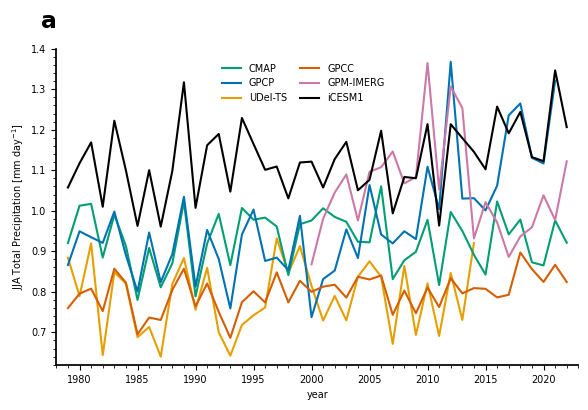

In [ ]:
# Create a custom RdYlBu colormap with white in the middle
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = 7
mpl.rcParams['hatch.color'] = 'silver'

colors = ['#332288','#117733','#44AA99','#88CCEE','#DDCC77','#CC6677','#AA4499','#882255']
colors = ['#000000','#E69F00','#56B4E9','#009E73','#F0E442','#0072B2','#D55E00','#CC79A7']

fig = plt.figure(figsize=(6,4))

## Panel 2 --------------------------------------------------
ax = fig.add_subplot(111)
ax.set_xlim([1978,2023])
ax.set_ylim([0.62,1.4])
ax.set_ylabel(r'JJA Total Precipitation [mm $\mathrm{day^{-1}}$]')
ax.yaxis.set_label_position("left")
ax.set_xlabel('year')
#ax.yaxis.tick_right()
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.25)
ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.02))    

ax.text(-0.03, 1.05, 'a', weight='bold',
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom', transform=ax.transAxes)

leg2 = plt.legend(loc='lower left', 
                 bbox_to_anchor=[0.4, 0.85], 
                 frameon=False,fontsize=7)
ax.add_artist(leg2)

lnd, = ax.plot(idware['year'],idware*10/92,linewidth=1.5,zorder=20,c=colors[1],label='UDel-TS')
ln0, = ax.plot(icmap['year'],icmap,linewidth=1.5,zorder=20,c=colors[3],label='CMAP')
ln1, = ax.plot(gpcp_i['year'],gpcp_i,linewidth=1.5,zorder=20,c=colors[5],label='GPCP') # (jja(igpcc)/30)
ln4, = ax.plot(igpcc.sel(year=slice(1979,2022))['year'],igpcc.sel(year=slice(1979,2022))/30,linewidth=1.5,zorder=20,c=colors[6],linestyle='-',label='GPCC') 
ln5, = ax.plot(gpm.sel(year=slice(1979,2022))['year'],24*gpm.sel(year=slice(1979,2022)),linewidth=1.5,zorder=20,c=colors[7],linestyle='-',label='GPM-IMERG') 
ln2, = ax.plot(icesm_prect_i['year'],icesm_prect_i,zorder=20,linewidth=1.5,c='k',label='iCESM1')

leg2 = plt.legend(handles=[ln0,ln1,lnd],loc='lower left', 
                 bbox_to_anchor=[0.3, 0.8], 
                 frameon=False,fontsize=7)
ax.add_artist(leg2)

leg3 = plt.legend(handles=[ln4,ln5,ln2],loc='lower left', 
                 bbox_to_anchor=[0.45, 0.8], 
                 frameon=False,fontsize=7)


fig.subplots_adjust(top=0.90,bottom=0.11,left=0.1,right=0.97,hspace=0.3,wspace=0.1)
fig.savefig('./plots/moisture_tagging-figure_1-6panel_blue-precip.png',dpi=600)